# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['hilo', 'longyearbyen', 'ekibastuz', 'bredasdorp', 'punta arenas', 'talnakh', 'busselton', 'vestmannaeyjar', 'albany', 'marcona', 'rikitea', 'avarua', 'khatanga', 'cherskiy', 'belyy yar', 'manyana', 'taolanaro', 'berdsk', 'vaini', 'cape town', 'pisco', 'castro', 'bluff', 'barrow', 'codajas', 'jamestown', 'constitucion', 'port elizabeth', 'mys shmidta', 'clyde river', 'hermanus', 'bhadasar', 'sur', 'harqalah', 'chuy', 'warqla', 'hofn', 'airai', 'hobart', 'mahebourg', 'porto novo', 'dikson', 'puerto carreno', 'ruteng', 'ushuaia', 'kaitangata', 'belaya gora', 'cidreira', 'broken hill', 'hithadhoo', 'ghimbav', 'alice springs', 'kapaa', 'iralaya', 'egvekinot', 'qaanaaq', 'esperance', 'avanigadda', 'aklavik', 'san patricio', 'tuktoyaktuk', 'yellowknife', 'severo-kurilsk', 'souillac', 'port hope', 'pathein', 'lebu', 'puerto escondido', 'muros', 'weligama', 'fairbanks', 'bonga', 'provideniya', 'senmonorom', 'vostok', 'amderma', 'saint-philippe', 'kodiak', 'los llanos de aridane', 'ati', 'puer

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Test for single city
# Build query URL
# Add imperial units argument to query
city = "San Francisco"
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
#need to removes spaces from url in the city name and replace with +
query_url = query_url.replace(" ", "+")

print(query_url)

weather_response = requests.get(query_url).json()
print(weather_response)

http://api.openweathermap.org/data/2.5/weather?appid=c101111115b41c09cbb8835f84042b04&q=San+Francisco&units=imperial
{'coord': {'lon': -122.4194, 'lat': 37.7749}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 64.22, 'feels_like': 64.53, 'temp_min': 57.29, 'temp_max': 76.1, 'pressure': 1016, 'humidity': 89}, 'visibility': 10000, 'wind': {'speed': 1.99, 'deg': 267, 'gust': 8.01}, 'clouds': {'all': 40}, 'dt': 1627749542, 'sys': {'type': 2, 'id': 2017837, 'country': 'US', 'sunrise': 1627737155, 'sunset': 1627787961}, 'timezone': -25200, 'id': 5391959, 'name': 'San Francisco', 'cod': 200}


In [4]:
# Get API response for each cities in cities list and append to list.
responses = []
for city in cities:
# Build query URL
    url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    #need to removes spaces from url in the city name and replace with +
    query_url = query_url.replace(" ", "+")

    #Get weather data
    weather_response = requests.get(query_url).json()
    #Append response to list
    responses.append(weather_response)
    print(f"Processing Record {cities.index(city)+1} of {len(cities)} | {city}")
    #pause loop for 1 second to stay within API limit of 60 requests per minute
    time.sleep(1.1)

Processing Record 1 of 597 | hilo
Processing Record 2 of 597 | longyearbyen
Processing Record 3 of 597 | ekibastuz
Processing Record 4 of 597 | bredasdorp
Processing Record 5 of 597 | punta arenas
Processing Record 6 of 597 | talnakh
Processing Record 7 of 597 | busselton
Processing Record 8 of 597 | vestmannaeyjar
Processing Record 9 of 597 | albany
Processing Record 10 of 597 | marcona
Processing Record 11 of 597 | rikitea
Processing Record 12 of 597 | avarua
Processing Record 13 of 597 | khatanga
Processing Record 14 of 597 | cherskiy
Processing Record 15 of 597 | belyy yar
Processing Record 16 of 597 | manyana
Processing Record 17 of 597 | taolanaro
Processing Record 18 of 597 | berdsk
Processing Record 19 of 597 | vaini
Processing Record 20 of 597 | cape town
Processing Record 21 of 597 | pisco
Processing Record 22 of 597 | castro
Processing Record 23 of 597 | bluff
Processing Record 24 of 597 | barrow
Processing Record 25 of 597 | codajas
Processing Record 26 of 597 | jamestown
P

Processing Record 205 of 597 | comodoro rivadavia
Processing Record 206 of 597 | cao bang
Processing Record 207 of 597 | qasigiannguit
Processing Record 208 of 597 | san jeronimo
Processing Record 209 of 597 | dong hoi
Processing Record 210 of 597 | butaritari
Processing Record 211 of 597 | camacha
Processing Record 212 of 597 | padang
Processing Record 213 of 597 | seymchan
Processing Record 214 of 597 | srednekolymsk
Processing Record 215 of 597 | lata
Processing Record 216 of 597 | kavieng
Processing Record 217 of 597 | torbay
Processing Record 218 of 597 | cayenne
Processing Record 219 of 597 | bengkulu
Processing Record 220 of 597 | khuzhir
Processing Record 221 of 597 | shubarshi
Processing Record 222 of 597 | znamenskoye
Processing Record 223 of 597 | estrela
Processing Record 224 of 597 | lakewood
Processing Record 225 of 597 | hasaki
Processing Record 226 of 597 | coihaique
Processing Record 227 of 597 | bardiyah
Processing Record 228 of 597 | ewa beach
Processing Record 229 o

Processing Record 407 of 597 | flinders
Processing Record 408 of 597 | saskylakh
Processing Record 409 of 597 | kulhudhuffushi
Processing Record 410 of 597 | ust-kuyga
Processing Record 411 of 597 | adiake
Processing Record 412 of 597 | kazalinsk
Processing Record 413 of 597 | zhaoyuan
Processing Record 414 of 597 | kralendijk
Processing Record 415 of 597 | swan hill
Processing Record 416 of 597 | north bend
Processing Record 417 of 597 | longavi
Processing Record 418 of 597 | shubarkuduk
Processing Record 419 of 597 | fukuchiyama
Processing Record 420 of 597 | thessalon
Processing Record 421 of 597 | bilma
Processing Record 422 of 597 | isangel
Processing Record 423 of 597 | orikum
Processing Record 424 of 597 | cotonou
Processing Record 425 of 597 | chapayeve
Processing Record 426 of 597 | ahipara
Processing Record 427 of 597 | port shepstone
Processing Record 428 of 597 | adrar
Processing Record 429 of 597 | lasa
Processing Record 430 of 597 | sarahan
Processing Record 431 of 597 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Export to CSV
#use json_normalize to store the json response into a dataframe
raw_data_df = pd.json_normalize(responses)
#export to csv so we dont have to repeat API requests each time
raw_data_df.to_csv(output_data_file, index=False, header=True)

In [15]:
# Display the DataFrame by calling the stored csv 
city_data_df = pd.read_csv(output_data_file, encoding="ISO-8859-1")
city_data_df

# Get list of columns to manipulate Dataframe
list(city_data_df.columns)

# New dataframe with columns we want
formatted_df = city_data_df[["name", "coord.lat","coord.lon","main.temp_max","main.humidity","clouds.all","wind.speed","sys.country","dt"]]

#Renaming columns
renamed_df = formatted_df.rename(columns={"name":"City","coord.lat":"Lat","coord.lon":"Lng","main.temp_max":"Max Temp","main.humidity":"Humidity","clouds.all":"Cloudiness","wind.speed":"Wind Speed","sys.country":"Country","dt":"Date"})

#take only rows where City column is not NaN value.
renamed_df = renamed_df[renamed_df['City'].notna()]
renamed_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,73.80,86.0,1.0,6.91,US,1.627750e+09
1,Longyearbyen,78.2186,15.6401,44.44,70.0,75.0,12.66,SJ,1.627750e+09
2,Ekibastuz,51.6667,75.3667,73.45,36.0,26.0,12.19,KZ,1.627750e+09
3,Bredasdorp,-34.5322,20.0403,56.52,82.0,94.0,3.44,ZA,1.627750e+09
4,Punta Arenas,-53.1500,-70.9167,41.11,60.0,0.0,13.80,CL,1.627750e+09
...,...,...,...,...,...,...,...,...,...
591,Tadine,-21.5500,167.8833,66.70,57.0,6.0,18.28,NC,1.627750e+09
593,Kargil,34.5667,76.1000,63.12,51.0,81.0,8.01,IN,1.627750e+09
594,Vao,-22.6667,167.4833,67.15,57.0,0.0,24.18,NC,1.627750e+09
595,Puerto del Rosario,28.5004,-13.8627,78.48,73.0,20.0,21.85,ES,1.627750e+09


In [16]:
renamed_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,19.810724,20.766387,71.133523,67.346789,54.007339,8.342349,1.627750e+09
std,33.207771,89.033993,14.599007,21.473884,37.894832,5.569284,2.219928e+02
min,-54.800000,-179.166700,32.490000,8.000000,0.000000,0.000000,1.627750e+09
25%,-8.419200,-56.327500,60.910000,54.000000,17.000000,4.070000,1.627750e+09
50%,22.075200,23.371600,72.210000,72.000000,57.000000,7.090000,1.627750e+09
75%,48.649900,99.935700,81.100000,85.000000,92.000000,11.500000,1.627750e+09
max,78.218600,179.316700,108.910000,100.000000,100.000000,29.680000,1.627750e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
#skip

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

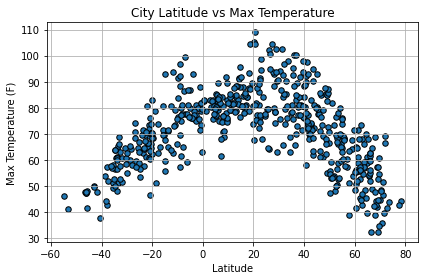

In [43]:
renamed_df.plot(kind="scatter", x="Lat", y="Max Temp", edgecolor="black", s=30)
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.tight_layout()
plt.show()

* Code is analysing the relationship between Latitude and Max Temperature by plotting the values from the Latitude column against the values in the Max Temperature column from the renamed_df DataFrame

## Latitude vs. Humidity Plot

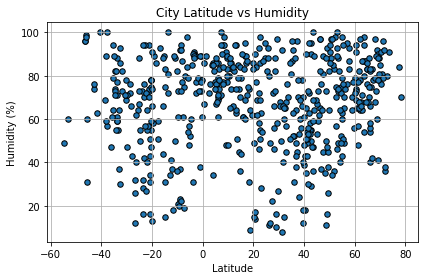

In [41]:
renamed_df.plot(kind="scatter", x="Lat", y="Humidity", edgecolor="black", s=30)
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.tight_layout()
plt.show()

* Code is analysing the relationship between Latitude and Humidity by plotting the values from the Latitude column against the values in the Humidity column from the renamed_df DataFrame

## Latitude vs. Cloudiness Plot

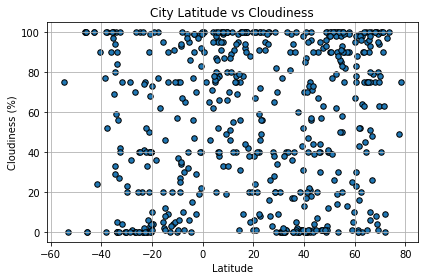

In [44]:
renamed_df.plot(kind="scatter", x="Lat", y="Cloudiness", edgecolor="black", s=30)
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.tight_layout()
plt.show()

* Code is analysing the relationship between Latitude and Cloudiness by plotting the values from the Latitude column against the values in the Cloudiness column from the renamed_df DataFrame

## Latitude vs. Wind Speed Plot

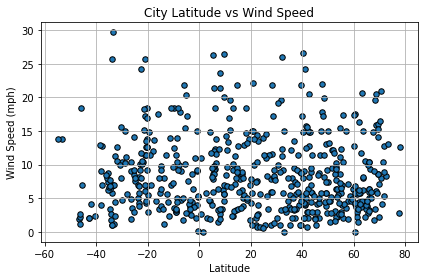

In [46]:
renamed_df.plot(kind="scatter", x="Lat", y="Wind Speed", edgecolor="black", s=30)
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.tight_layout()
plt.show()

* Code is analysing the relationship between Latitude and Wind Speed by plotting the values from the Latitude column against the values in the Wind Speed column from the renamed_df DataFrame

## Linear Regression

In [49]:
## make a northern hemisphere and southern hemisphere dataframe
north_hemi_df = renamed_df.loc[renamed_df["Lat"] >= 0]
#check to see if latitudes are 0 or greater
north_hemi_df.describe()

south_hemi_df = renamed_df.loc[renamed_df["Lat"] < 0]
#check to see if latitudes are less than 0
south_hemi_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,1.710000e+02
mean,-20.884991,28.892153,66.958129,64.877193,45.116959,8.534211,1.627750e+09
std,12.782639,93.352127,12.154728,22.646441,38.324133,5.509072,2.343370e+02
min,-54.800000,-175.200000,37.710000,12.000000,0.000000,0.130000,1.627750e+09
25%,-31.345700,-56.059700,59.000000,50.500000,4.000000,4.305000,1.627750e+09
50%,-20.750000,26.650000,66.130000,71.000000,40.000000,7.580000,1.627750e+09
75%,-9.416250,128.825000,75.915000,82.000000,85.000000,11.490000,1.627750e+09
max,-0.316700,173.166700,99.430000,100.000000,100.000000,29.680000,1.627750e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

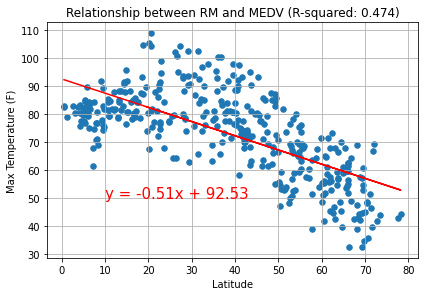

In [78]:
north_hemi_df.plot(kind="scatter", x="Lat", y="Max Temp", s=30)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.tight_layout()

# Define scatter values for x and y axis
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Max Temp"]

# Compute regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Get y_axis values for the the regression line and add to plot
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

# Get string with the equation formula and add to plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,50),fontsize=15,color="red")

# Add title with the value for the r-squared
plt.title(f"Relationship between RM and MEDV (R-squared: {round(rvalue**2, 3)})")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

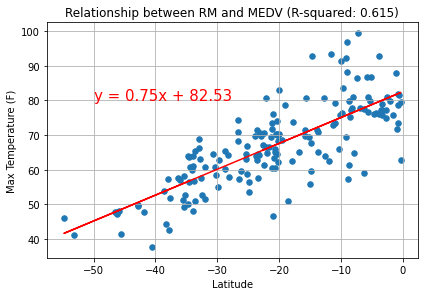

In [77]:
south_hemi_df.plot(kind="scatter", x="Lat", y="Max Temp", s=30)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.tight_layout()

# Define scatter values for x and y axis
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Max Temp"]

# Compute regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Get y_axis values for the the regression line and add to plot
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

# Get string with the equation formula and add to plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")

# Add title with the value for the r-squared
plt.title(f"Relationship between RM and MEDV (R-squared: {round(rvalue**2, 3)})")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

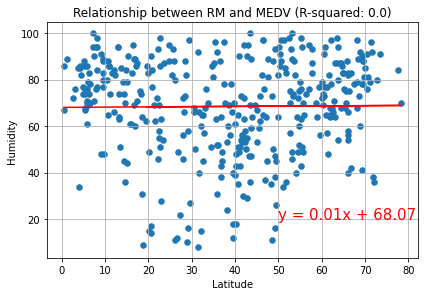

In [76]:
north_hemi_df.plot(kind="scatter", x="Lat", y="Humidity", s=30)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.tight_layout()

# Define scatter values for x and y axis
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Humidity"]

# Compute regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Get y_axis values for the the regression line and add to plot
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

# Get string with the equation formula and add to plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(50,20),fontsize=15,color="red")

# Add title with the value for the r-squared
plt.title(f"Relationship between RM and MEDV (R-squared: {round(rvalue**2, 3)})")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

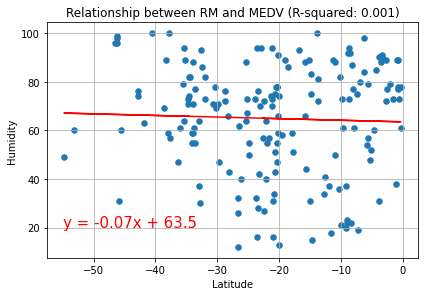

In [75]:
south_hemi_df.plot(kind="scatter", x="Lat", y="Humidity", s=30)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.tight_layout()

# Define scatter values for x and y axis
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Humidity"]

# Compute regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Get y_axis values for the the regression line and add to plot
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

# Get string with the equation formula and add to plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

# Add title with the value for the r-squared
plt.title(f"Relationship between RM and MEDV (R-squared: {round(rvalue**2, 3)})")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

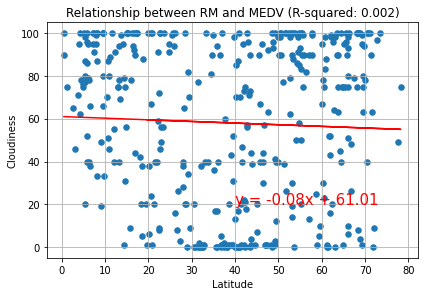

In [74]:
north_hemi_df.plot(kind="scatter", x="Lat", y="Cloudiness", s=30)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.tight_layout()

# Define scatter values for x and y axis
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Cloudiness"]

# Compute regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Get y_axis values for the the regression line and add to plot
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

# Get string with the equation formula and add to plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

# Add title with the value for the r-squared
plt.title(f"Relationship between RM and MEDV (R-squared: {round(rvalue**2, 3)})")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

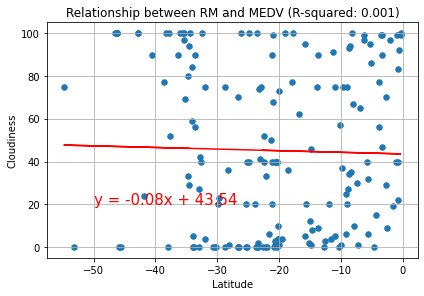

In [81]:
south_hemi_df.plot(kind="scatter", x="Lat", y="Cloudiness", s=30)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.tight_layout()

# Define scatter values for x and y axis
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Cloudiness"]

# Compute regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Get y_axis values for the the regression line and add to plot
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

# Get string with the equation formula and add to plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# Add title with the value for the r-squared
plt.title(f"Relationship between RM and MEDV (R-squared: {round(rvalue**2, 3)})")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

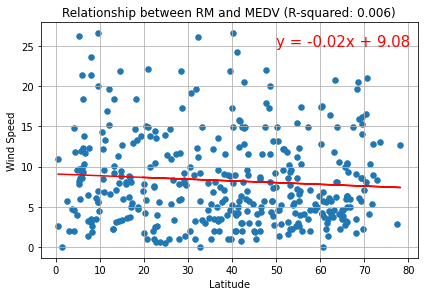

In [83]:
north_hemi_df.plot(kind="scatter", x="Lat", y="Wind Speed", s=30)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.tight_layout()

# Define scatter values for x and y axis
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Wind Speed"]

# Compute regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Get y_axis values for the the regression line and add to plot
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

# Get string with the equation formula and add to plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(50,25),fontsize=15,color="red")

# Add title with the value for the r-squared
plt.title(f"Relationship between RM and MEDV (R-squared: {round(rvalue**2, 3)})")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

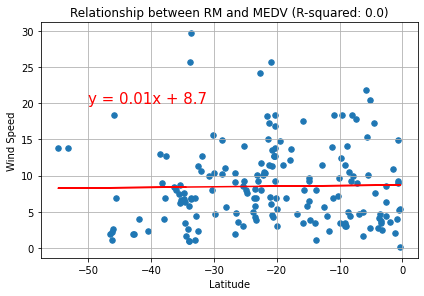

In [84]:
south_hemi_df.plot(kind="scatter", x="Lat", y="Wind Speed", s=30)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.tight_layout()

# Define scatter values for x and y axis
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Wind Speed"]

# Compute regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Get y_axis values for the the regression line and add to plot
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

# Get string with the equation formula and add to plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# Add title with the value for the r-squared
plt.title(f"Relationship between RM and MEDV (R-squared: {round(rvalue**2, 3)})")

plt.show()